In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

#import data
TrainingSetValues = pd.read_csv('Data/TrainingSetValues.csv')
TrainingSetLabels = pd.read_csv('Data/TrainingSetLabels.csv')
TestSetValues = pd.read_csv('Data/TestSetValues.csv')

In [2]:
#preview data
TrainingSetValues

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
#preview data
TrainingSetLabels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [4]:
#preview data
TestSetValues

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [5]:
#merge training set for final dataframe
df = pd.merge(TrainingSetValues, TrainingSetLabels, on="id")
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
df.info()

#funder, installer, subvillage, public_meeting, scheme_management, scheme_name*, permit, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [8]:
df.scheme_name.value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Windmili system           1
Hale water suppy          1
Kifaru Water Supply       1
Bulenya water supply      1
Lichipi                   1
Name: scheme_name, Length: 2696, dtype: int64

### Data Dictionary

from:https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

amount_tsh - Total static head (amount water available to waterpoint) <br>
date_recorded - The date the row was entered <font color='red'>DELETE?</font><br>
funder - Who funded the well<br>
gps_height - Altitude of the well<br>
installer - Organization that installed the well<br>
longitude - GPS coordinate<br>
latitude - GPS coordinate<br>
wpt_name - Name of the waterpoint if there is one<br>
num_private - <font color='red'>DELETE?</font><br>
basin - Geographic water basin<br>
subvillage - Geographic location<br>
region - Geographic location<br>
region_code - Geographic location (coded)<br>
district_code - Geographic location (coded)<br>
lga - Geographic location<br>
ward - Geographic location<br>
population - Population around the well<br>
public_meeting - True/False<br>
recorded_by - Group entering this row of data <font color='red'>MAYBE DELETE?</font><br>
scheme_management - Who operates the waterpoint<br>
scheme_name - Who operates the waterpoint <font color='red'>DELETE</font> <br>
permit - If the waterpoint is permitted<br>
construction_year - Year the waterpoint was constructed<br>
extraction_type - The kind of extraction the waterpoint uses<br>
extraction_type_group - The kind of extraction the waterpoint uses<br>
extraction_type_class - The kind of extraction the waterpoint uses<br>
management - How the waterpoint is managed<br>
management_group - How the waterpoint is managed<br>
payment - What the water costs<br>
payment_type - What the water costs<br>
water_quality - The quality of the water<br>
quality_group - The quality of the water<br>
quantity - The quantity of water<br>
quantity_group - The quantity of water<br>
source - The source of the water<br>
source_type - The source of the water<br>
source_class - The source of the water<br>
waterpoint_type - The kind of waterpoint<br>
waterpoint_type_group - The kind of waterpoint<br>

In [9]:
#there are duplicate longitude/latitude pairs
df[['longitude', 'latitude']].value_counts()

longitude  latitude     
0.000000   -2.000000e-08    1812
32.987670  -2.490324e+00       2
37.274352  -7.102004e+00       2
37.534327  -6.964258e+00       2
37.339811  -7.065373e+00       2
                            ... 
36.697381  -2.733935e+00       1
36.697309  -8.092875e+00       1
36.697063  -8.110059e+00       1
36.697013  -3.350101e+00       1
35.004687  -9.265576e+00       1
Length: 57520, dtype: int64

In [10]:
#drop duplicate wells
for item in df['longitude'].value_counts()[df['longitude'].value_counts() == 2].index:
    df.drop(index = np.where(df.longitude == item)[0][0], inplace = True)
    
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [11]:
df[df['longitude'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [12]:
import os
os.environ["PROJ_LIB"] = r'C:\Users\17178\anaconda3\envs\learn-env\Library\share\basemap'
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


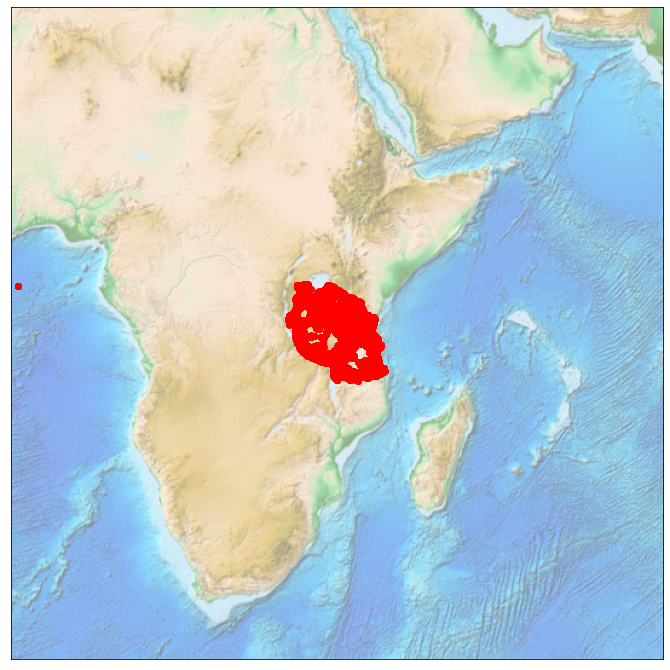

In [13]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-6.392, lon_0=35.002)
#            llcrnrlon=-13, llcrnrlat=28,
#            urcrnrlon=.25, urcrnrlat=42)
m.etopo(scale=.5, alpha=0.5)

lat = df['latitude'].values
long = df['longitude'].values

# Map (long, lat) to (x, y) for plotting
x,y = m(long,lat)
m.plot(x,y,'ro','markersize=3');

In [14]:
#let's split latitude/longitude into 4 quadrants: NE, NW, SE, SW based on m(35, -6.4). Long = 0 will be 'missing'

conditions = [df['longitude'] == 0, (df['longitude'] > 35) & (df['latitude'] > -6.4), 
              (df['longitude'] > 35) & (df['latitude'] <= -6.4), (df['longitude'] <= 35) & (df['latitude'] > -6.4),
             (df['longitude'] <= 35) & (df['latitude'] <= -6.4)]

choices = ['missing', 'NE', 'SE', 'NW', 'SW']

df['geographical_split'] = np.select(conditions, choices)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,SW
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,NE
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,SE
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,SE
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,SW
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


''

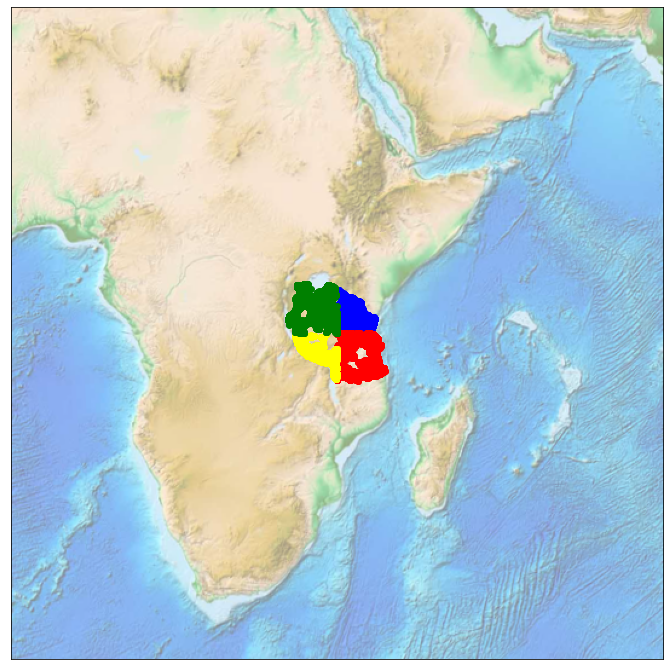

In [15]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-6.392, lon_0=35.002)
#            llcrnrlon=-13, llcrnrlat=28,
#            urcrnrlon=.25, urcrnrlat=42)
m.etopo(scale=.5, alpha=0.5)

lat_nw = df[df['geographical_split']=='NW']['latitude'].values
long_nw = df[df['geographical_split']=='NW']['longitude'].values
lat_ne = df[df['geographical_split']=='NE']['latitude'].values
long_ne = df[df['geographical_split']=='NE']['longitude'].values
lat_se = df[df['geographical_split']=='SE']['latitude'].values
long_se = df[df['geographical_split']=='SE']['longitude'].values
lat_sw = df[df['geographical_split']=='SW']['latitude'].values
long_sw = df[df['geographical_split']=='SW']['longitude'].values

# Map (long, lat) to (x, y) for plotting
x,y = m(long_ne,lat_ne)
m.plot(x,y,'ro','markersize=3', color='blue')

x,y = m(long_se,lat_se)
m.plot(x,y,'ro','markersize=3', color='red')

x,y = m(long_sw,lat_sw)
m.plot(x,y,'ro','markersize=3', color='yellow')

x,y = m(long_nw,lat_nw)
m.plot(x,y,'ro','markersize=3', color='green')


;

In [16]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,SW
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,NE
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,SE
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,SE
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,SW
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NE


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59327 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59327 non-null  int64  
 1   amount_tsh             59327 non-null  float64
 2   date_recorded          59327 non-null  object 
 3   funder                 55698 non-null  object 
 4   gps_height             59327 non-null  int64  
 5   installer              55678 non-null  object 
 6   longitude              59327 non-null  float64
 7   latitude               59327 non-null  float64
 8   wpt_name               59327 non-null  object 
 9   num_private            59327 non-null  int64  
 10  basin                  59327 non-null  object 
 11  subvillage             58956 non-null  object 
 12  region                 59327 non-null  object 
 13  region_code            59327 non-null  int64  
 14  district_code          59327 non-null  int64  
 15  lg

In [ ]:
# df['funder'].fillna('missing', inplace=True)
# df['installer'].fillna('missing', inplace=True)
# df['subvillage'].fillna('missing', inplace=True)
# df['scheme_management'].fillna('missing', inplace=True)
# df['permit'].fillna('missing', inplace=True)
# df['public_meeting'].fillna('missing', inplace=True)

# mask = df.applymap(type) != bool
# d = {True: 'TRUE', False: 'FALSE'}

# df = df.where(mask, df.replace(d))

In [18]:
df['status_group'].value_counts()

functional                 32216
non functional             22798
functional needs repair     4313
Name: status_group, dtype: int64

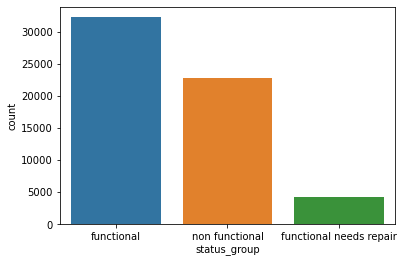

0.5430242553980481

0.3842769733847995

0.07269877121715239

In [19]:
sns.countplot(x='status_group', data=df)
plt.show()

display(df['status_group'].value_counts()[0] / len(df['status_group']))
display(df['status_group'].value_counts()[1] / len(df['status_group']))
display(df['status_group'].value_counts()[2] / len(df['status_group']))

In [20]:
df.groupby('status_group').median()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
status_group,,,,,,,,,,
functional,36873.5,0.0,550.0,34.969779,-4.905241,0.0,11.0,3.0,40.0,1995.0
functional needs repair,37180.0,0.0,383.0,33.826926,-4.656904,0.0,15.0,3.0,25.0,1978.0
non functional,37292.0,0.0,293.0,34.958383,-5.421011,0.0,13.0,3.0,1.0,1980.0


In [21]:
df_MAIN = df
df_MAIN

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,SW
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,NE
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,SE
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,SE
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,SW
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NE


# data xploraion

### Construction Year variable

In [22]:
df['construction_year'] = np.where(df['construction_year'] == 0, np.nan, df['construction_year'])
df['construction_year'].isnull().sum()

20689

In [23]:
df.groupby('status_group').median()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
status_group,,,,,,,,,,
functional,36873.5,0.0,550.0,34.969779,-4.905241,0.0,11.0,3.0,40.0,2003.0
functional needs repair,37180.0,0.0,383.0,33.826926,-4.656904,0.0,15.0,3.0,25.0,1998.0
non functional,37292.0,0.0,293.0,34.958383,-5.421011,0.0,13.0,3.0,1.0,1994.0


In [24]:
#previewing the data of the wells with a missing construction year
df[df['construction_year'].isnull()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geographical_split
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,NW
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,NW
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,NW
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,NW
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,...,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,NW
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,SW
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,good,insufficient,insufficient,dam,dam,surface,other,other,functional,NW
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,SW


In [25]:
#previewing the data of the wells with a missing construction year
df[df['construction_year'].isnull()][['amount_tsh', 'gps_height', 'population', 'construction_year']].describe()

,amount_tsh,gps_height,population,construction_year
count,20689.000000,20689.000000,20689.000000,0.0
mean,39.427928,44.173280,11.973803,NaN
std,1492.981282,257.321853,156.038846,NaN
min,0.000000,-90.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,NaN
max,200000.000000,2215.000000,6922.000000,NaN


In [26]:
df[df['construction_year'].isnull()]['status_group'].value_counts()

functional                 10545
non functional              8355
functional needs repair     1789
Name: status_group, dtype: int64

In [27]:
display(df['construction_year'].value_counts().sort_index(ascending=False))
df.groupby('status_group')['construction_year'].median()

#how to handle NaN?

2013.0     176
2012.0    1082
2011.0    1254
2010.0    2642
2009.0    2527
2008.0    2611
2007.0    1586
2006.0    1467
2005.0    1008
2004.0    1120
2003.0    1286
2002.0    1074
2001.0     539
2000.0    2087
1999.0     978
1998.0     964
1997.0     643
1996.0     811
1995.0    1012
1994.0     737
1993.0     607
1992.0     638
1991.0     324
1990.0     954
1989.0     315
1988.0     520
1987.0     302
1986.0     434
1985.0     945
1984.0     779
1983.0     488
1982.0     743
1981.0     238
1980.0     810
1979.0     192
1978.0    1035
1977.0     201
1976.0     412
1975.0     437
1974.0     676
1973.0     184
1972.0     707
1971.0     145
1970.0     411
1969.0      59
1968.0      76
1967.0      88
1966.0      17
1965.0      19
1964.0      40
1963.0      85
1962.0      30
1961.0      21
1960.0     102
Name: construction_year, dtype: int64

status_group
functional                 2003.0
functional needs repair    1998.0
non functional             1994.0
Name: construction_year, dtype: float64

<AxesSubplot:>

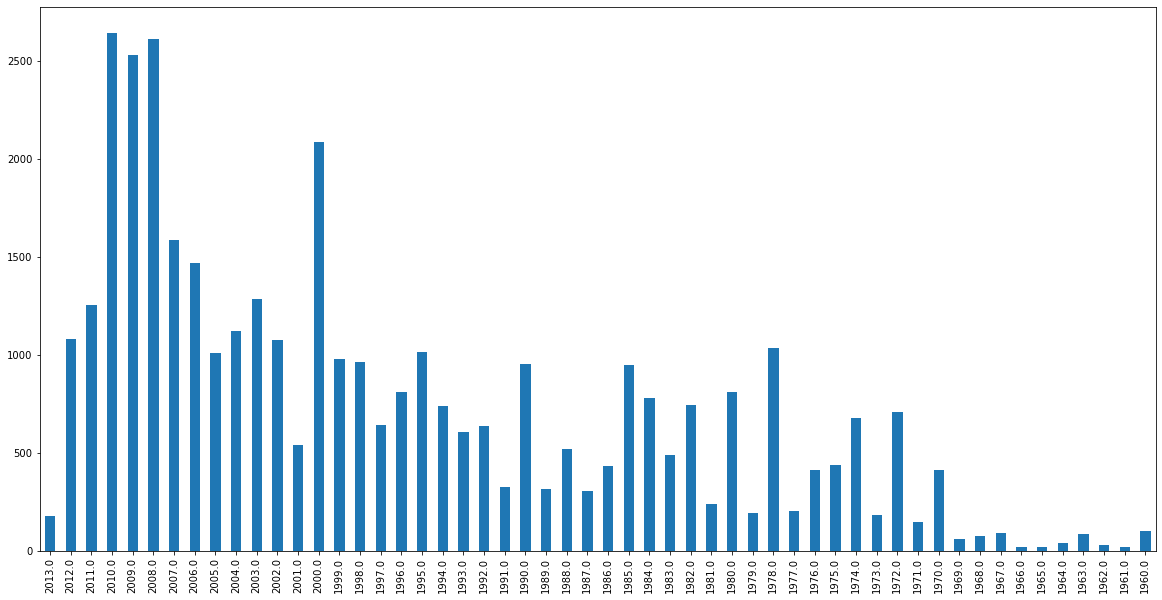

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

df['construction_year'].value_counts().sort_index(ascending=False).plot(kind='bar')

### Population variable

In [29]:
df['population'].describe()

count    59327.000000
mean       179.901023
std        471.686504
min          0.000000
25%          0.000000
50%         25.000000
75%        214.000000
max      30500.000000
Name: population, dtype: float64

In [30]:
display(df['population'].value_counts())
#how to handle 0?

0       21360
1        7018
200      1937
150      1892
250      1677
        ...  
406         1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [31]:
df['population'] = np.where(df['population'] == 0, np.nan, df['population'])
df['population'].isnull().sum()

21360

In [32]:
df.groupby('status_group')['population'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,20953.0,288.406672,613.455897,1.0,45.0,150.0,315.0,30500.0
functional needs repair,2539.0,297.487594,531.453679,1.0,60.0,200.0,400.0,15300.0
non functional,14475.0,267.680967,492.659393,1.0,1.0,150.0,320.0,9865.0


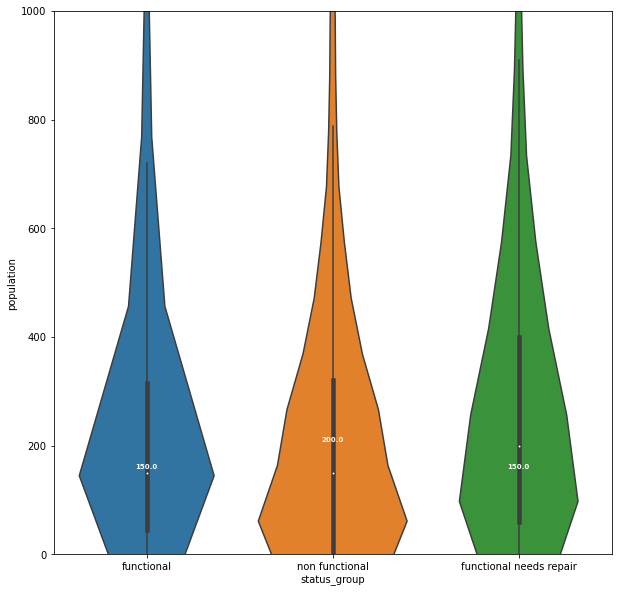

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='population').set(ylim=(0,1000))

medians = df.groupby(['status_group'])['population'].median().values
vertical_offset = df['population'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

Appears that population doesn't seem to differ between the status groups?

### GPS Height variable

In [34]:
df.groupby('status_group')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32216.0,740.111901,724.266757,-90.0,0.0,550.0,1404.25,2628.0
functional needs repair,4313.0,626.762578,648.006847,-51.0,0.0,383.0,1242.00,2770.0
non functional,22798.0,574.572112,642.820109,-59.0,0.0,293.0,1211.00,2627.0


In [35]:
df['gps_height'].value_counts()
#how to handle 0s and negatives?

 0       20418
-15         60
-16         55
-13         55
-20         52
         ...  
 2424        1
 2552        1
 2413        1
 2614        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [36]:
df['gps_height'] = np.where(df['gps_height'] == 0, np.nan, df['gps_height'])
df['gps_height'].isnull().sum()

20418

In [37]:
display(df.groupby('status_group')['gps_height'].describe())

df['gps_height'].value_counts()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,21758.0,1095.847275,621.977227,-90.0,503.0,1249.0,1570.00,2628.0
functional needs repair,2550.0,1060.089020,500.797549,-51.0,730.5,1159.0,1422.75,2770.0
non functional,14601.0,897.136840,596.497638,-59.0,321.0,997.0,1384.00,2627.0


-15.0      60
-16.0      55
-13.0      55
 1290.0    52
-20.0      52
           ..
 2285.0     1
 649.0      1
 2312.0     1
 2257.0     1
 2347.0     1
Name: gps_height, Length: 2427, dtype: int64

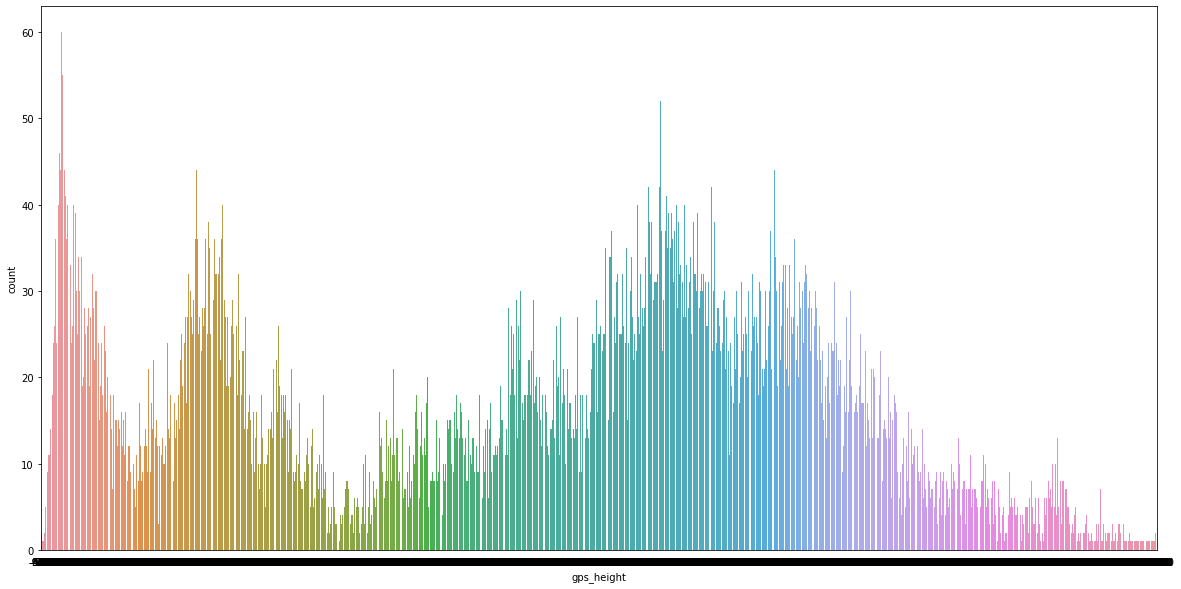

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(x=df['gps_height'], data=df).tick_params(bottom=False)
#               order=df['gps_height'].value_counts().iloc[:25].index)

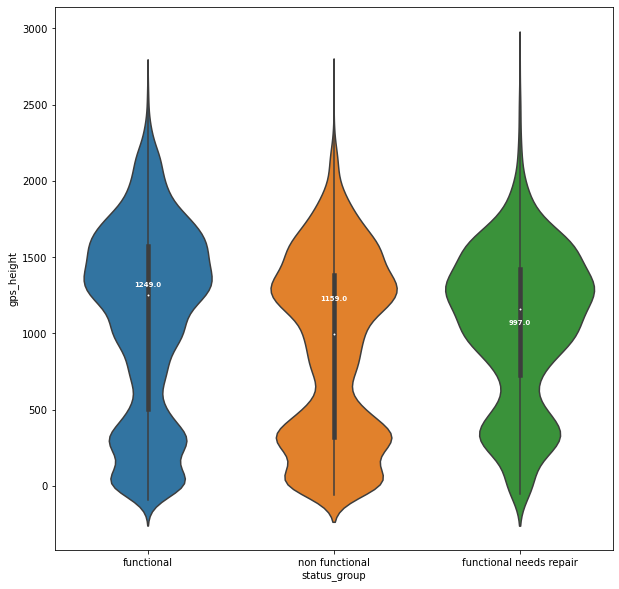

In [39]:
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='gps_height')

medians = df.groupby(['status_group'])['gps_height'].median().values
vertical_offset = df['gps_height'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

### Amount_tsh Variable

In [40]:
df.groupby('status_group')['amount_tsh'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32216.0,461.524685,3891.599852,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4313.0,266.855553,1925.725371,0.0,0.0,0.0,50.0,100000.0
non functional,22798.0,123.604509,1110.746862,0.0,0.0,0.0,0.0,117000.0


In [61]:
df['amount_tsh'].isnull().sum()

41594

In [41]:
df['amount_tsh'].value_counts()

0.0         41594
500.0        3100
50.0         2468
1000.0       1487
20.0         1462
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [42]:
df['amount_tsh'] = np.where(df['amount_tsh'] == 0, np.nan, df['amount_tsh'])
df['amount_tsh'].isnull().sum()

41594

In [43]:
df.groupby('status_group')['amount_tsh'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,12531.0,1186.535731,6170.637210,0.25,50.0,250.0,1000.0,350000.0
functional needs repair,1268.0,907.687697,3469.694575,6.00,100.0,300.0,600.0,100000.0
non functional,3934.0,716.302898,2593.573427,0.20,50.0,200.0,500.0,117000.0


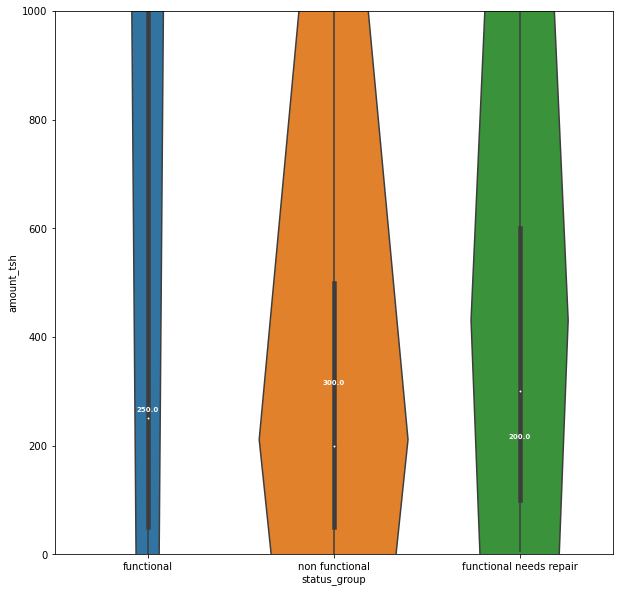

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='amount_tsh').set(ylim=(0,1000))

medians = df.groupby(['status_group'])['amount_tsh'].median().values
vertical_offset = df['amount_tsh'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

In [ ]:
#we will drop this category because 41k records are missing (2/3)

### Geographical_split Variable

In [45]:
df.groupby('geographical_split')['status_group'].value_counts()

geographical_split  status_group           
NE                  functional                 8644
                    non functional             5227
                    functional needs repair     906
NW                  functional                 9302
                    non functional             7696
                    functional needs repair    1604
SE                  functional                 7337
                    non functional             6012
                    functional needs repair     684
SW                  functional                 6063
                    non functional             3307
                    functional needs repair     733
missing             functional                  870
                    non functional              556
                    functional needs repair     386
Name: status_group, dtype: int64

In [46]:
display(len(df[(df['geographical_split'] == 'NE') & (df['status_group'] == 'non functional')]) / len(df[df['geographical_split'] == 'NE']))
display(len(df[(df['geographical_split'] == 'NW') & (df['status_group'] == 'non functional')]) / len(df[df['geographical_split'] == 'NW']))
display(len(df[(df['geographical_split'] == 'SE') & (df['status_group'] == 'non functional')]) / len(df[df['geographical_split'] == 'SE']))
display(len(df[(df['geographical_split'] == 'SW') & (df['status_group'] == 'non functional')]) / len(df[df['geographical_split'] == 'SW']))

0.35372538404276915

0.4137189549510805

0.42841872728568375

0.32732851628229237

# Finalizing columns to look at

In [ ]:
#missing EDA to show selection
df_MAIN = df.drop(['id', 'date_recorded', 'longitude', 'latitude', 'wpt_name', 'num_private', 'region','recorded_by',
                  'scheme_name', 'payment', 'quality_group', 'quantity_group','source_type', 'source_class', 
                  'waterpoint_type_group', 'status_group','extraction_type_group', 'extraction_type_class', 
                  'management_group','ward'], axis = 1)

continuous = ['amount_tsh', 'gps_height', 'population']

categorical = ['funder', 'installer', 'basin', 'subvillage', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management','construction_year', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

target = ['status_group']

In [47]:
categorical = ['funder', 'installer', 'basin', 'subvillage', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management','construction_year', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

for cat in categorical:
    print(cat, df_MAIN[cat].nunique())

funder 1896
installer 2144
basin 9
subvillage 19271
region_code 27
district_code 20
lga 125
public_meeting 2
scheme_management 12
permit 2
extraction_type 18
management 12
construction_year 54
payment_type 7
water_quality 8
quantity 5
source 10
waterpoint_type 7
geographical_split 5


In [48]:
categorical_numerous = []

for cat in categorical:
    if df_MAIN[cat].nunique() >= 1000:
        categorical_numerous.append(cat)
    else:
        continue
        
categorical_numerous

['funder', 'installer', 'subvillage']

In [49]:
#select top 20 categories to OHE for categories with over 1000 unique values
for cat_num in categorical_numerous:
    top_cats = [cat_num + '_' + cat for cat in df_MAIN[cat_num].value_counts().sort_values(ascending = False).head(20).index]
    for cat in top_cats:
        df_MAIN[cat] = np.where(df_MAIN[cat_num] == cat, 1, 0) # whenever a top 20 cat, replace it with 1 else 0

df_MAIN

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,subvillage_Songambele,subvillage_Msikitini,subvillage_Miembeni,subvillage_1,subvillage_Kibaoni,subvillage_Kanisani,subvillage_Mapinduzi,subvillage_I,subvillage_Mjini,subvillage_Mjimwema
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,0,0,0,0,0,0,0,0,0,0
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,0,0,0,0,0,0,0,0,0,0
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,0,0,0,0,0,0,0,0,0,0
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,0,0,0,0,0,0,0,0,0,0
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,0,0,0,0,0,0,0,0,0,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,0,0,0,0,0,0,0,0,0,0
59397,37057,NaN,2011-04-11,NaN,NaN,NaN,34.017087,-8.750434,Mashine,0,...,0,0,0,0,0,0,0,0,0,0
59398,31282,NaN,2011-03-08,Malec,NaN,Musa,35.861315,-6.378573,Mshoro,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_MAIN = df.drop(['id', 'date_recorded', 'longitude', 'latitude', 'wpt_name', 'num_private', 'region','recorded_by',
                  'scheme_name', 'payment', 'quality_group', 'quantity_group','source_type', 'source_class', 
                  'waterpoint_type_group', 'extraction_type_group', 'extraction_type_class', 
                  'management_group','ward', 'funder', 'installer', 'subvillage', 'amount_tsh'], axis = 1)
df_MAIN

,gps_height,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,...,subvillage_Songambele,subvillage_Msikitini,subvillage_Miembeni,subvillage_1,subvillage_Kibaoni,subvillage_Kanisani,subvillage_Mapinduzi,subvillage_I,subvillage_Mjini,subvillage_Mjimwema
0,1390.0,Lake Nyasa,11,5,Ludewa,109.0,True,VWC,False,1999.0,...,0,0,0,0,0,0,0,0,0,0
1,1399.0,Lake Victoria,20,2,Serengeti,280.0,NaN,Other,True,2010.0,...,0,0,0,0,0,0,0,0,0,0
2,686.0,Pangani,21,4,Simanjiro,250.0,True,VWC,True,2009.0,...,0,0,0,0,0,0,0,0,0,0
3,263.0,Ruvuma / Southern Coast,90,63,Nanyumbu,58.0,True,VWC,True,1986.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Lake Victoria,18,1,Karagwe,NaN,True,NaN,True,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210.0,Pangani,3,5,Hai,125.0,True,Water Board,True,1999.0,...,0,0,0,0,0,0,0,0,0,0
59396,1212.0,Rufiji,11,4,Njombe,56.0,True,VWC,True,1996.0,...,0,0,0,0,0,0,0,0,0,0
59397,NaN,Rufiji,12,7,Mbarali,NaN,True,VWC,False,NaN,...,0,0,0,0,0,0,0,0,0,0
59398,NaN,Rufiji,1,4,Chamwino,NaN,True,VWC,True,NaN,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.impute import KNNImputer

new_data = {0: np.nan}

df_MAIN = df_MAIN.replace({'construction_year':new_data})
df_MAIN = df_MAIN.replace({'population':new_data})
df_MAIN = df_MAIN.replace({'gps_height':new_data})

imputer_year = KNNImputer(n_neighbors=2, weights='distance')
imputer_pop = KNNImputer(n_neighbors=2, weights='distance')
imputer_gps = KNNImputer(n_neighbors=2, weights='distance')

df_year = imputer_year.fit_transform(df_MAIN['construction_year'].values.reshape(-1, 1))
df_pop = imputer_pop.fit_transform(df_MAIN['population'].values.reshape(-1, 1))
df_gps = imputer_gps.fit_transform(df_MAIN['gps_height'].values.reshape(-1, 1))

df_MAIN['construction_year'] = df_year
df_MAIN['population'] = df_pop
df_MAIN['gps_height'] = df_gps

In [52]:
df_MAIN.describe()

,amount_tsh,gps_height,region_code,district_code,population,construction_year,funder_Government Of Tanzania,funder_Danida,funder_Hesawa,funder_Rwssp,...,subvillage_Songambele,subvillage_Msikitini,subvillage_Miembeni,subvillage_1,subvillage_Kibaoni,subvillage_Kanisani,subvillage_Mapinduzi,subvillage_I,subvillage_Mjini,subvillage_Mjimwema
count,17733.000000,59327.000000,59327.000000,59327.000000,59327.000000,59327.000000,59327.0,59327.0,59327.0,59327.0,...,59327.0,59327.0,59327.0,59327.0,59327.0,59327.0,59327.0,59327.0,59327.0,59327.0
mean,1062.277271,1018.935645,15.295228,5.627370,281.112229,1996.812283,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5412.727956,496.091865,17.585787,9.627139,451.973286,10.065656,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.200000,-90.000000,1.000000,0.000000,1.000000,1960.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50.000000,903.000000,5.000000,2.000000,100.000000,1996.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,250.000000,1018.935645,12.000000,3.000000,281.112229,1996.812283,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1000.000000,1320.000000,17.000000,5.000000,281.112229,2004.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,350000.000000,2770.000000,99.000000,80.000000,30500.000000,2013.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df_MAIN.isnull().sum()

gps_height              20418
basin                       0
region_code                 0
district_code               0
lga                         0
                        ...  
subvillage_Kanisani         0
subvillage_Mapinduzi        0
subvillage_I                0
subvillage_Mjini            0
subvillage_Mjimwema         0
Length: 79, dtype: int64

In [ ]:
continuous = ['amount_tsh', 'gps_height', 'population', 'construction_year']

categorical = ['basin', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

X = df_MAIN.drop('status_group', axis=1)
y = df_MAIN['status_group']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

In [ ]:
X_num = df[continuous].columns
X_cat = df[categorical].columns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numTrans = Pipeline(steps=[('scaler', StandardScaler())])
catTrans = Pipeline(steps=[('ohe', OneHotEncoder(drop='first',sparse=False))])

pp = ColumnTransformer(transformers=[('num', numTrans, X_num),('cat', catTrans, X_cat)])
pp.fit(X_train)

In [ ]:
df_ohe = pd.get_dummies(df, columns=categorical)
df_ohe

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

from sklearn.compose import make_column_transformer
#use this whenever features in your df have different pre-processing steps
#applies OHE to categorical features. Remainder gets passed through.
column_trans = make_column_transformer((OneHotEncoder(), categorical), remainder='passthrough')
X = column_trans.fit_transform(X)